In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
from keras import backend as K

K.set_image_dim_ordering('th')


Using TensorFlow backend.


In [2]:
seed = 12456
np.random.seed(seed)

In [3]:
(traindf,y_train),(testdf,y_test)=fashion_mnist.load_data()

In [4]:
traindf.shape
testdf.shape
max(traindf[3,1])

255

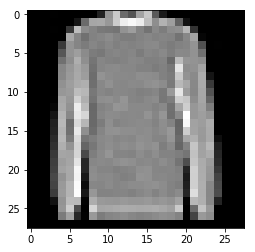

In [5]:
plt.imshow(traindf[45],plt.get_cmap('gray'))

In [6]:
#reshaping the data
#[samples][pixels][width][height]
traindf = traindf.reshape(traindf.shape[0],1,28,28).astype("int")
testdf = testdf.reshape(testdf.shape[0],1,28,28).astype("int")

In [7]:
#infering the shape
traindf.shape
testdf.shape

(10000, 1, 28, 28)

In [8]:
#normalizing
traindf = traindf/255 
testdf = testdf/255

In [9]:
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
# defining the model
def model_find():
    model = Sequential()
    model.add(Conv2D(40,(4,4),input_shape=(1,28,28),activation='relu')) #convoluation with 30*(4*4)layer
    model.add(MaxPooling2D(pool_size=(2,2))) #pooling with 2*2 layer
    model.add(Conv2D(10,(2,2),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.3))
    model.add(Flatten())        
    model.add(Dense(128,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(num_classes,activation='relu'))
    model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
    return(model)

In [15]:
model = model_find()

In [ ]:
model.fit(traindf, y_train, validation_data = (testdf,y_test), epochs=3, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
